Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


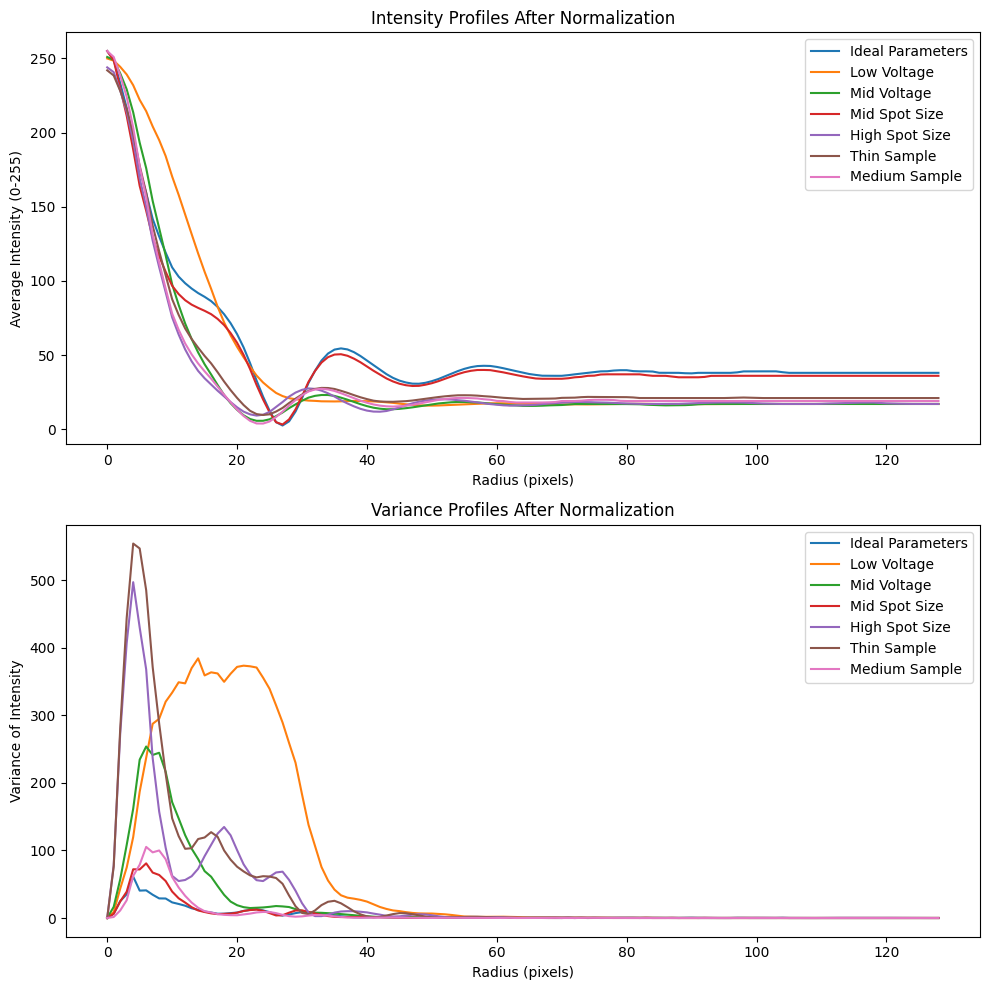

RMSE between PSF 1 and PSF 2 (Intensity): 24.97019696284338
RMSE between PSF 1 and PSF 2 (Variance): 141.76981971517705
RMSE between PSF 1 and PSF 3 (Intensity): 23.988899813890026
RMSE between PSF 1 and PSF 3 (Variance): 47.922724734440244
RMSE between PSF 1 and PSF 4 (Intensity): 4.405446695879577
RMSE between PSF 1 and PSF 4 (Variance): 6.863247758134255
RMSE between PSF 1 and PSF 5 (Intensity): 25.012075204984697
RMSE between PSF 1 and PSF 5 (Variance): 79.82100225148321
RMSE between PSF 1 and PSF 6 (Intensity): 19.968025115748567
RMSE between PSF 1 and PSF 6 (Variance): 99.61603670744992
RMSE between PSF 1 and PSF 7 (Intensity): 23.27733687544
RMSE between PSF 1 and PSF 7 (Variance): 12.69294515530704


In [11]:
# Cheney Zhang
# Senior Project Reduced Order Model

import numpy as np
import matplotlib.pyplot as plt
from skimage import draw
from PIL import Image
from google.colab import drive

# Function to compute the intensity and variance profiles
def get_intensity_and_variance_profiles(image_path):
    image = Image.open(image_path)
    image_np = np.array(image)

    # Normalize the image and ensure it is 8-bit
    if image_np.dtype == np.int32 and image_np.max() > 255:
        image_np = (image_np / 65535.0 * 255).astype(np.uint8)
    image_gray = image_np

    # Find the center of the image
    center = np.array(image_gray.shape) // 2

    # Initialize the lists for intensities and variances
    intensity_profile = []
    variance_profile = []

    # Define a max_radius to avoid going outside the image
    max_radius = min(center)

    # Loop for increasing circles
    for r in range(0, max_radius + 1):
        rr, cc = draw.circle_perimeter(center[0], center[1], r, shape=image_gray.shape)
        coords = ((rr >= 0) & (rr < image_gray.shape[0]) & (cc >= 0) & (cc < image_gray.shape[1]))
        rr, cc = rr[coords], cc[coords]
        ring_pixels = image_gray[rr, cc]
        if ring_pixels.size > 0:
            ring_intensity = np.mean(ring_pixels)
            ring_variance = np.var(ring_pixels)
            intensity_profile.append(ring_intensity)
            variance_profile.append(ring_variance)

    return np.array(intensity_profile), np.array(variance_profile)

# Function to calculate RMSE between profiles
def calculate_rmse(reference, comparison):
    return np.sqrt(np.mean((reference - comparison) ** 2))

# Mount Google Drive
drive.mount('/content/drive')

# Path to the images
image_paths = [

    # Ideal Parameters (High Voltage, Low Minimum Spot Size, Thick Sample)
    '/content/drive/My Drive/SEM_2_PROJ/UltraThick/PSF/ideal.png',

    # Low Voltage
    '/content/drive/My Drive/SEM_2_PROJ/UltraThick/Voltage/PSF/5kV.png',

    # Medium Voltage
    '/content/drive/My Drive/SEM_2_PROJ/UltraThick/Voltage/PSF/15kV.png',

    # Medium Minimum Spot Size
    '/content/drive/My Drive/SEM_2_PROJ/UltraThick/PSF/6BI.png',

    # High Minimum Spot Size
    '/content/drive/My Drive/SEM_2_PROJ/UltraThick/PSF/15BI.png',

    # Thin Sample
    '/content/drive/My Drive/SEM_2_PROJ/Thin/PSF/9BI.png',

    # Medium Sample
    '/content/drive/My Drive/SEM_2_PROJ/Reg/PSF/9BI.png'

]

# Compute profiles for each PSF and plot them
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
labels = ['Ideal Parameters', 'Low Voltage', 'Mid Voltage', 'Mid Spot Size', 'High Spot Size', 'Thin Sample', 'Medium Sample']
profiles = []

for path, label in zip(image_paths, labels):
    intensity_profile, variance_profile = get_intensity_and_variance_profiles(path)
    profiles.append((intensity_profile, variance_profile))
    axes[0].plot(intensity_profile, label=label)
    axes[1].plot(variance_profile, label=label)

axes[0].set_title('Intensity Profiles After Normalization')
axes[0].set_xlabel('Radius (pixels)')
axes[0].set_ylabel('Average Intensity (0-255)')
axes[0].legend()

axes[1].set_title('Variance Profiles After Normalization')
axes[1].set_xlabel('Radius (pixels)')
axes[1].set_ylabel('Variance of Intensity')
axes[1].legend()

plt.tight_layout()
plt.show()

# Calculate and print RMSE between PSF 1 and the others
for i, (profile, path) in enumerate(zip(profiles, image_paths), start=1):
    if i > 1:  # Skip the first since it's the reference
        intensity_rmse = calculate_rmse(profiles[0][0], profile[0])
        variance_rmse = calculate_rmse(profiles[0][1], profile[1])
        print(f'RMSE between PSF 1 and PSF {i} (Intensity): {intensity_rmse}')
        print(f'RMSE between PSF 1 and PSF {i} (Variance): {variance_rmse}')